Se importa libreria pandas para manejo de datos
Se pone el PATH del archivo
Se pone un encoding para el archivo

In [23]:
import numpy as np
import pandas as pd
#Personaliza aspecto visual para grafucis
import seaborn as sns
sns.set_palette('husl')

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Especifica la ruta del archivo .txt
ruta_archivo = 'C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\Tarea 040324\\PARAMETROS_FINALES_CRUDOS.csv'
encoding = 'latin-1'

Se lee archivo de la ruta, con el encoding y la separacion por coma
Se imprime las primeras filas del DataFrame
Se imprime todos los nombres de los encabezados

In [24]:

# Lee el archivo .txt en un DataFrame de Pandas
dataframe = pd.read_csv(ruta_archivo,encoding= encoding, sep=',' )
# Muestra las primeras filas del DataFrame para verificar la carga de datos
print(dataframe.head())


   CLOROF_A  COLI_FEC  COLI_TOT   E_COLI     COT  COT_SOL  DBO_SOL  DBO_TOT  \
0       NaN   24196.0   24196.0      NaN  2.3560   2.3500     3.33     6.63   
1       NaN   24196.0   24196.0  24196.0  8.3441   6.4727     2.73     4.11   
2       NaN   24196.0   24196.0   3654.0  8.1953   6.1425     4.97     6.65   
3       NaN   24196.0   24196.0    776.0  7.6502   4.0415     2.00     2.34   
4       NaN     663.0   12997.0    109.0  9.4452   3.0909     2.00     2.33   

   DQO_SOL  DQO_TOT  ...  TEMP_AMB  PROFUNDIDAD    CAUDAL   DUR_TOT  \
0     12.6  18.0872  ...      35.3          NaN     430.0  303.3400   
1     15.5  27.8784  ...      26.7          NaN  420000.0  222.9984   
2     10.0  16.1600  ...      34.6          NaN     180.0  224.4432   
3     10.0  10.0000  ...       NaN          NaN       5.0  414.9600   
4     10.0  25.4700  ...      37.4          NaN       5.0  298.9900   

   TEMP_AGUA  CONDUC_CAMPO  pH_CAMPO   OD_%  OD_mg/L  \
0       24.6        1200.0      8.20   83.

In [25]:
print("Nombres de los datos:")
print(dataframe.iloc[:0, ])

Nombres de los datos:
Empty DataFrame
Columns: [CLOROF_A, COLI_FEC, COLI_TOT, E_COLI, COT, COT_SOL, DBO_SOL, DBO_TOT, DQO_SOL, DQO_TOT, N_NH3, N_NO2, N_NO3, N_ORG, N_TOT, N_TOTK, P_TOT, ORTO_PO4, COLOR_VER, TRANSPARENCIA, ABS_UV, SDT, SAAM, SST, TURBIEDAD, TEMP_AMB, PROFUNDIDAD, CAUDAL, DUR_TOT, TEMP_AGUA, CONDUC_CAMPO, pH_CAMPO, OD_%, OD_mg/L, NOMBRE DEL SITIO]
Index: []

[0 rows x 35 columns]


Se seleccionan solo las columnas 

In [26]:
columnas_deseadas = ['OD_mg/L', 'CONDUC_CAMPO', 'TEMP_AGUA', 'pH_CAMPO']
nuevo_dataframe = dataframe[columnas_deseadas]
print(nuevo_dataframe.head())

print(nuevo_dataframe.info())

   OD_mg/L  CONDUC_CAMPO  TEMP_AGUA  pH_CAMPO
0     5.26        1200.0       24.6      8.20
1     7.21         677.0       24.3      7.97
2     7.31         479.0       25.8      8.02
3     7.07         930.0       29.9      8.05
4     9.06        1170.0       33.1      8.27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OD_mg/L       5912 non-null   float64
 1   CONDUC_CAMPO  6108 non-null   float64
 2   TEMP_AGUA     5941 non-null   float64
 3   pH_CAMPO      6067 non-null   float64
dtypes: float64(4)
memory usage: 192.7 KB
None


In [27]:
data = nuevo_dataframe.dropna()
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 5656 entries, 0 to 6161
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OD_mg/L       5656 non-null   float64
 1   CONDUC_CAMPO  5656 non-null   float64
 2   TEMP_AGUA     5656 non-null   float64
 3   pH_CAMPO      5656 non-null   float64
dtypes: float64(4)
memory usage: 220.9 KB
None


Describe los datos (Maximo, minimo, porcentajes, etc.)

In [28]:
data.describe()

,OD_mg/L,CONDUC_CAMPO,TEMP_AGUA,pH_CAMPO
count,5656.000000,5656.000000,5656.000000,5656.000000
mean,7.180562,18293.398362,28.547056,8.113287
std,2.296085,27252.913203,3.622815,0.460694
min,1.000000,63.000000,16.300000,0.200000
25%,6.087500,230.000000,25.900000,7.820000
50%,7.310000,717.000000,29.100000,8.100000
75%,8.420000,45811.750000,31.400000,8.400000
max,21.660000,148300.000000,39.600000,10.000000


Normalizar los datos

In [29]:
from sklearn.preprocessing import MinMaxScaler
columnas_a_normalizar = ['OD_mg/L', 'CONDUC_CAMPO', 'TEMP_AGUA', 'pH_CAMPO']
# Crea un objeto StandardScaler
scaler = MinMaxScaler()

# Aplica la normalización estándar a las columnas seleccionadas
dataNorm = scaler.fit_transform(data[columnas_a_normalizar])
dataNorm = pd.DataFrame(dataNorm, columns=columnas_a_normalizar)

dataNorm.describe()


# Ahora, df contiene las columnas normalizadas

,OD_mg/L,CONDUC_CAMPO,TEMP_AGUA,pH_CAMPO
count,5656.000000,5656.000000,5656.000000,5656.000000
mean,0.299156,0.122981,0.525625,0.807478
std,0.111137,0.183847,0.155486,0.047010
min,0.000000,0.000000,0.000000,0.000000
25%,0.246249,0.001127,0.412017,0.777551
50%,0.305421,0.004412,0.549356,0.806122
75%,0.359148,0.308619,0.648069,0.836735
max,1.000000,1.000000,1.000000,1.000000


Valores independientes

In [30]:
X = dataNorm.drop('pH_CAMPO', axis=1)
print(X.head())
print(X.shape)

    OD_mg/L  CONDUC_CAMPO  TEMP_AGUA
0  0.206196      0.007670   0.356223
1  0.300581      0.004142   0.343348
2  0.305421      0.002806   0.407725
3  0.293804      0.005849   0.583691
4  0.390126      0.007468   0.721030
(5656, 3)


Valores dependientes

In [31]:
y = dataNorm['pH_CAMPO']
print(y.head())
print(y.shape)

0    0.816327
1    0.792857
2    0.797959
3    0.801020
4    0.823469
Name: pH_CAMPO, dtype: float64
(5656,)


Grafico prueba del codo - Regresion, margen de error

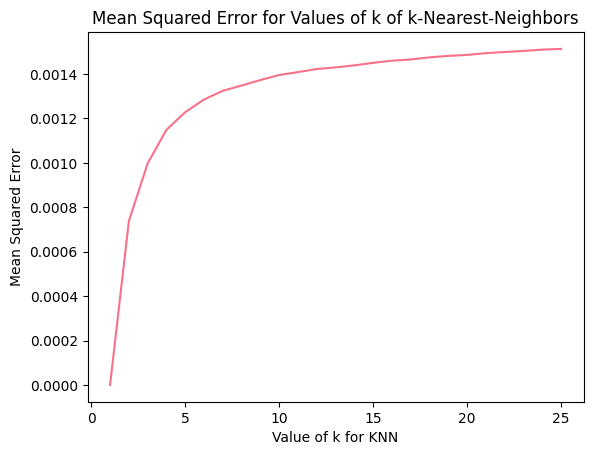

In [32]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    # Depending on your regression task, you might need a different evaluation metric
    # For example, mean squared error (MSE) could be used:
    mse = metrics.mean_squared_error(y, y_pred)
    scores.append(mse)

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Values of k of k-Nearest-Neighbors')
plt.show()

Margen de error

In [33]:
# Ahora, veamos también cómo se comporta una regresión lineal (Linear Regression)
logreg = LinearRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.mean_squared_error(y, y_pred))

0.001665199995819862


Se preparan los datos de entrenamiento y los de test

In [34]:
seed_number = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed_number)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3393, 3)
(3393,)
(2263, 3)
(2263,)


Grafico con los datos de entrenamiento

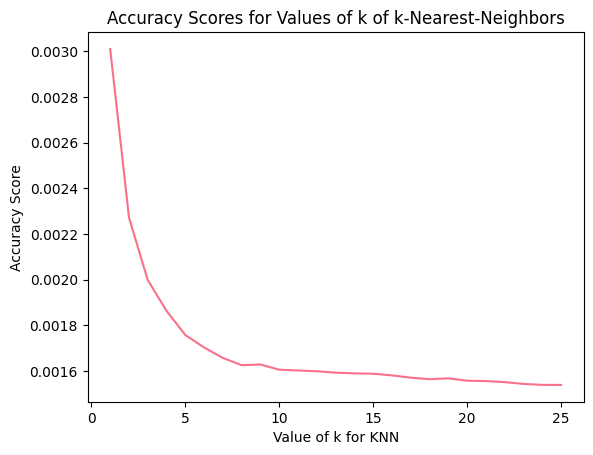

In [35]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    scores.append(mse)

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

Margen de error

In [36]:
logreg = LinearRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))

0.0015705748284537998


Se entrena el KNN con vecinos y los valores de entrenamiento

In [37]:
numFila = 4
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

Tabla de datos

In [38]:
print(X_test.head())
print("")
print(y_test.head())

       OD_mg/L  CONDUC_CAMPO  TEMP_AGUA
5112  0.497096      0.287627   0.721030
153   0.375605      0.001781   0.270386
757   0.469506      0.320682   0.145923
5066  0.038722      0.402983   0.536481
4060  0.259923      0.000823   0.515021

5112    0.836735
153     0.811224
757     0.816327
5066    0.724490
4060    0.795918
Name: pH_CAMPO, dtype: float64


Datos de test independientes

In [39]:
data_predictX = X_test[0:10].values
print(data_predictX[numFila])


[0.25992256 0.00082301 0.51502146]


Datos de test dependientes

In [40]:
data_predictY = y_test[0:10].values
print(data_predictY[numFila])

0.7959183673469387


Prediccion

In [41]:
dato_predecir = data_predictX[numFila]
resultado = knn.predict([dato_predecir])[0]
valorReal = data_predictY[numFila]
print("El resultado es "+str(resultado))
print("El valor real es "+str(valorReal))
print("El error es "+str(abs(resultado-valorReal)))
print("El porcentaje de acierto es "+str(100-abs(resultado-valorReal)/valorReal*100)+"%")


El resultado es 0.7723809523809524
El valor real es 0.7959183673469387
El error es 0.02353741496598627
El porcentaje de acierto es 97.04273504273506%


C:\Users\Waldosir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
